In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv("diabetes.csv")
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [ ]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


<Axes: >

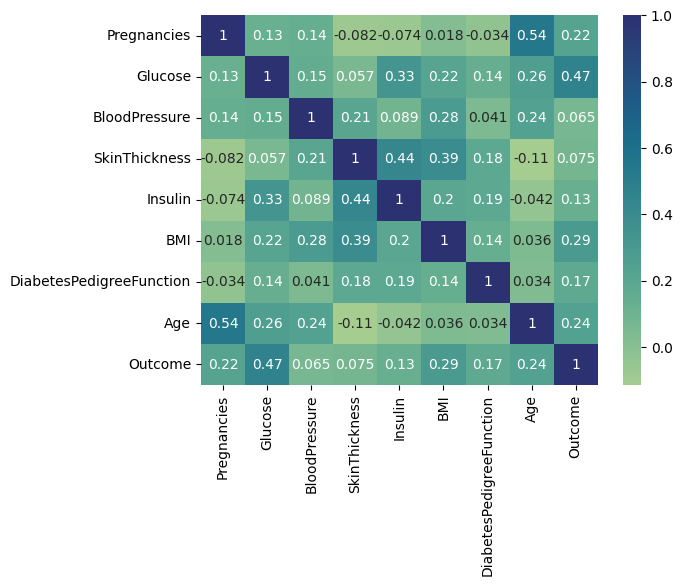

In [ ]:
sns.heatmap(df.corr(),cmap="crest",annot=True,)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
x=df[['Pregnancies','Glucose','BMI','Age']]
# x=df.drop('Outcome',axis=1)
y=df['Outcome']
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': range(1, 21)}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, Y_train)
print("Best k:", grid_search.best_params_)

Best k: {'n_neighbors': 20}


In [ ]:
knn=KNeighborsClassifier(n_neighbors=5,metric="euclidean")
knn.fit(X_train,Y_train)
Y_pred=knn.predict(X_test)
knn.score(X_test,Y_test)

0.8051948051948052

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,recall_score
cm=confusion_matrix(Y_test,Y_pred)
print("Confusion Matrix is as follows: ")
print(cm)

Confusion Matrix is as follows: 
[[94 13]
 [17 30]]


In [ ]:
accuracy=accuracy_score(Y_test,Y_pred)
print("Accuracy is: ",accuracy)
precision=precision_score(Y_test,Y_pred)
print("Error Rate is: ",1-accuracy)
print("Precision score is: ",precision)
recall=recall_score(Y_test,Y_pred)
print("Recall score is: ",recall)

Accuracy is:  0.8051948051948052
Error Rate is:  0.19480519480519476
Precision score is:  0.6976744186046512
Recall score is:  0.6382978723404256


0.19497169497169498


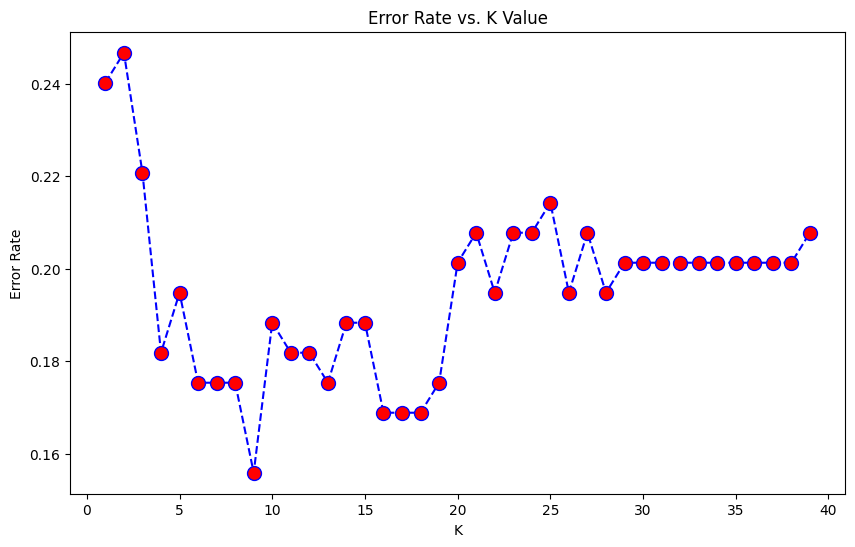

In [ ]:
import statistics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

error_rate = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

print(statistics.mean(error_rate))

In [ ]:
knn=KNeighborsClassifier(n_neighbors=9,metric="euclidean")
knn.fit(X_train,Y_train)
Y_pred=knn.predict(X_test)
knn.score(X_test,Y_test)

0.8441558441558441

In [ ]:
accuracy=accuracy_score(Y_test,Y_pred)
print("Accuracy is: ",accuracy)
precision=precision_score(Y_test,Y_pred)
print("Error Rate is: ",1-accuracy)
print("Precision score is: ",precision)
recall=recall_score(Y_test,Y_pred)
print("Recall score is: ",recall)

Accuracy is:  0.8441558441558441
Error Rate is:  0.1558441558441559
Precision score is:  0.7674418604651163
Recall score is:  0.7021276595744681
